In [12]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
# Set path
dataset_path = r'path\animals'
  # <- update this

# Define generator with rescaling and validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create train and validation generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [16]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # for binary classification
])


c:\Users\pavit\anaconda3\envs\eeg-digit\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [18]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


c:\Users\pavit\anaconda3\envs\eeg-digit\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 853ms/step - accuracy: 0.5272 - loss: 1.1438 - val_accuracy: 0.5950 - val_loss: 0.6434
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 855ms/step - accuracy: 0.6958 - loss: 0.5418 - val_accuracy: 0.8100 - val_loss: 0.4506
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 823ms/step - accuracy: 0.8707 - loss: 0.3210 - val_accuracy: 0.8550 - val_loss: 0.2975
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 997ms/step - accuracy: 0.9310 - loss: 0.2283 - val_accuracy: 0.9300 - val_loss: 0.1975
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9348 - loss: 0.1634 - val_accuracy: 0.8850 - val_loss: 0.2372
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9154 - loss: 0.1979 - val_accuracy: 0.9450 - val_loss: 0.1471
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9861 - loss: 0.0709 - val_accuracy: 0.9350 - val_loss: 0.1321
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9882 - loss: 0.0383 - val_accuracy: 0.9650

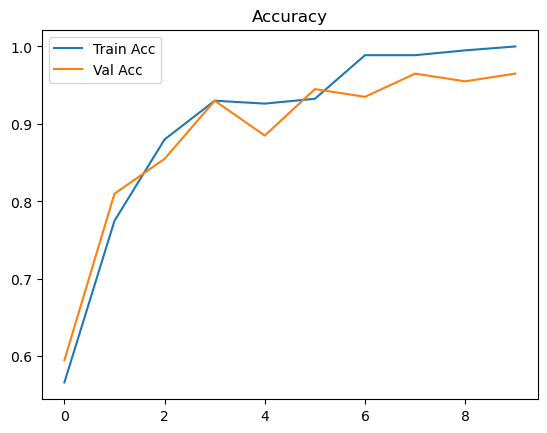

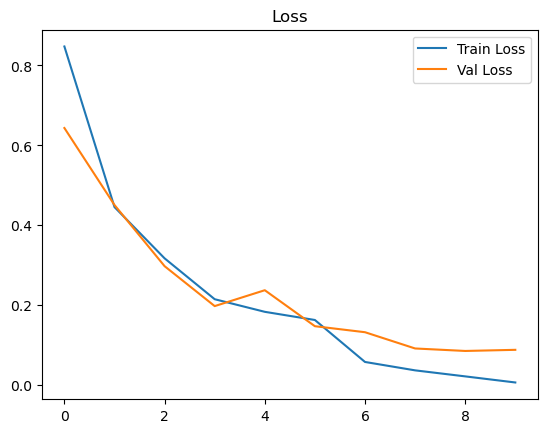

In [19]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [24]:
model.save('my_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


C:\Users\pavit\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


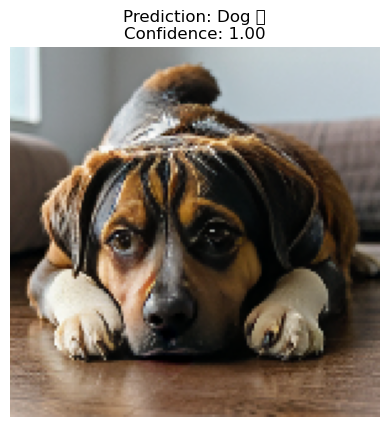

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("my_model.keras")

# Image path
img_path = r"\animals\dog\00502-3846168664.png"

# Load and preprocess image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)[0][0]

# Determine label
label = "Dog 🐶" if prediction > 0.5 else "Cat 🐱"
confidence = prediction if prediction > 0.5 else 1 - prediction

# Display the image with label
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {label}\nConfidence: {confidence:.2f}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


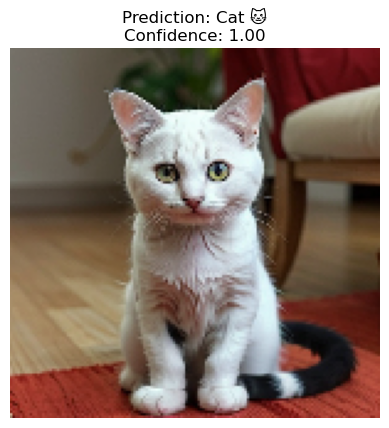

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("my_model.keras")

# Image path
img_path = r"\animals\cat\00002-4122619875.png"

# Load and preprocess image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)[0][0]

# Determine label
label = "Dog 🐶" if prediction > 0.5 else "Cat 🐱"
confidence = prediction if prediction > 0.5 else 1 - prediction

# Display the image with label
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {label}\nConfidence: {confidence:.2f}")
plt.show()
